### FICO оноо таамаглах ML model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("fico_mn2.csv")
df.head()

,ID,Орлого (₮),Нас,Туршлага (жил),Гэрлэсэн эсэх,Орон сууц,Машинтай эсэх,Мэргэжил,Хот,Ажлын жил,Оршин суусны жил,Шинэ зээл лавлагаа(%),Зээлийн түүх(%),Зээлийн багц(%),Зээлийн үлдэгдэл(%),Эргэн төлөлт(%),FICO оноо
0,1,9490142,64,29,үгүй,эзэмшдэг,тийм,Эмч,Эрдэнэт,11,18,50,100.0,80,19.0,100.0,677
1,2,7585207,60,21,үгүй,эзэмшдэг,тийм,Инженер,Өлгий,13,15,80,100.0,81,15.2,97.4,683
2,3,9943065,31,11,тийм,эзэмшдэг,тийм,Бусад,Дархан,11,14,90,83.1,86,19.9,68.9,630
3,4,12569089,23,2,тийм,эзэмшдэг,тийм,Багш,Дархан,9,15,80,50.9,48,25.1,84.3,616
4,5,7297539,26,6,үгүй,эзэмшдэг,тийм,Менежер,Улаангом,19,10,40,62.2,62,14.6,78.8,583


FICO оноог зээлийн түүх (15%), шинэ зээл лавлагаа (10%), зээлийн багц (10%), зээлийн үлдэгдэл (30%), эргэн төлөлт (35%) гэсэн таван шалгуур үзүүлэлтээр дүгнэж, 300-850 оноогоор илэрхийлдэг. Ийм учраас dataset-ээ үүсгэхдээ дотоод 5 үзүүлэлтийн оноо (0–100%) үүсгээд жинлэлтээр нэгтгэсэн. 0–100 оноог 300–850 FICO онооруу хөрвүүлсэн.

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1000 non-null   int64  
 1   Орлого (₮)             1000 non-null   int64  
 2   Нас                    1000 non-null   int64  
 3   Туршлага (жил)         1000 non-null   int64  
 4   Гэрлэсэн эсэх          1000 non-null   object 
 5   Орон сууц              1000 non-null   object 
 6   Машинтай эсэх          1000 non-null   object 
 7   Мэргэжил               1000 non-null   object 
 8   Хот                    1000 non-null   object 
 9   Ажлын жил              1000 non-null   int64  
 10  Оршин суусны жил       1000 non-null   int64  
 11  Шинэ зээл лавлагаа(%)  1000 non-null   int64  
 12  Зээлийн түүх(%)        1000 non-null   float64
 13  Зээлийн багц(%)        1000 non-null   int64  
 14  Зээлийн үлдэгдэл(%)    1000 non-null   float64
 15  Эргэн

In [5]:
print(df.describe())

                ID    Орлого (₮)          Нас  Туршлага (жил)    Ажлын жил  \
count  1000.000000  1.000000e+03  1000.000000     1000.000000  1000.000000   
mean    500.500000  8.073917e+06    42.839000       11.863000     9.477000   
std     288.819436  2.899198e+06    13.016317       10.460672     5.839141   
min       1.000000  2.000000e+06    21.000000        0.000000     0.000000   
25%     250.750000  6.057229e+06    32.000000        3.000000     4.000000   
50%     500.500000  8.075902e+06    42.000000        9.000000    10.000000   
75%     750.250000  9.943831e+06    54.000000       18.000000    15.000000   
max    1000.000000  1.955819e+07    65.000000       46.000000    19.000000   

       Оршин суусны жил  Шинэ зээл лавлагаа(%)  Зээлийн түүх(%)  \
count       1000.000000            1000.000000      1000.000000   
mean           9.681000              70.120000        77.040500   
std            5.751201              17.107843        19.976828   
min            0.000000      

In [6]:
df.columns

Index(['ID', 'Орлого (₮)', 'Нас', 'Туршлага (жил)', 'Гэрлэсэн эсэх',
       'Орон сууц', 'Машинтай эсэх', 'Мэргэжил', 'Хот', 'Ажлын жил',
       'Оршин суусны жил', 'Шинэ зээл лавлагаа(%)', 'Зээлийн түүх(%)',
       'Зээлийн багц(%)', 'Зээлийн үлдэгдэл(%)', 'Эргэн төлөлт(%)',
       'FICO оноо'],
      dtype='object')

In [7]:
print(df["Орлого (₮)"].dtype)
print(df["Орлого (₮)"].head(10))

int64
0     9490142
1     7585207
2     9943065
3    12569089
4     7297539
5     7297589
6    12737638
7    10302304
8     6591576
9     9627680
Name: Орлого (₮), dtype: int64


In [8]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [9]:
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

In [10]:
print("ҮНДСЭН МЭДЭЭЛЭЛ")
print(f"Хэмжээ: {df.shape[0]} мөр, {df.shape[1]} багана")
print(f"Сул утга: {df.isnull().sum().sum()}")
print(f"Давхардсан мөр: {df.duplicated().sum()}")
print("\n")

ҮНДСЭН МЭДЭЭЛЭЛ
Хэмжээ: 1000 мөр, 17 багана
Сул утга: 0
Давхардсан мөр: 0




In [11]:
print("FICO ОНООНИЙ ШИНЖИЛГЭЭ")
print(f"FICO оноо:")
print(f"  Дундаж: {df['FICO оноо'].mean():.1f}")
print(f"  Медиан: {df['FICO оноо'].median():.1f}")
print(f"  Стандарт хэлбэлзэл: {df['FICO оноо'].std():.1f}")
print(f"  Хамгийн бага: {df['FICO оноо'].min()}")
print(f"  Хамгийн их: {df['FICO оноо'].max()}")

FICO ОНООНИЙ ШИНЖИЛГЭЭ
FICO оноо:
  Дундаж: 619.5
  Медиан: 622.0
  Стандарт хэлбэлзэл: 35.4
  Хамгийн бага: 479
  Хамгийн их: 709


In [12]:
def categorize_fico(score):
    if score >= 700:
        return 'Онцгой сайн (700+)'
    elif score >= 630:
        return 'Маш сайн (630-699)'
    elif score >= 600:
        return 'Сайн (600-629)'
    elif score >= 580:
        return 'Боломжийн (580-599)'
    elif score >= 390:
        return 'Тааруу (390-579)'
    else:
        return 'Маш тааруу (<390)'

df['FICO категори'] = df['FICO оноо'].apply(categorize_fico)
print("\nFICO категориор хуваарилалт:")
print(df['FICO категори'].value_counts())
print("\n")


FICO категориор хуваарилалт:
FICO категори
Маш сайн (630-699)     412
Сайн (600-629)         306
Боломжийн (580-599)    150
Тааруу (390-579)       129
Онцгой сайн (700+)       3
Name: count, dtype: int64




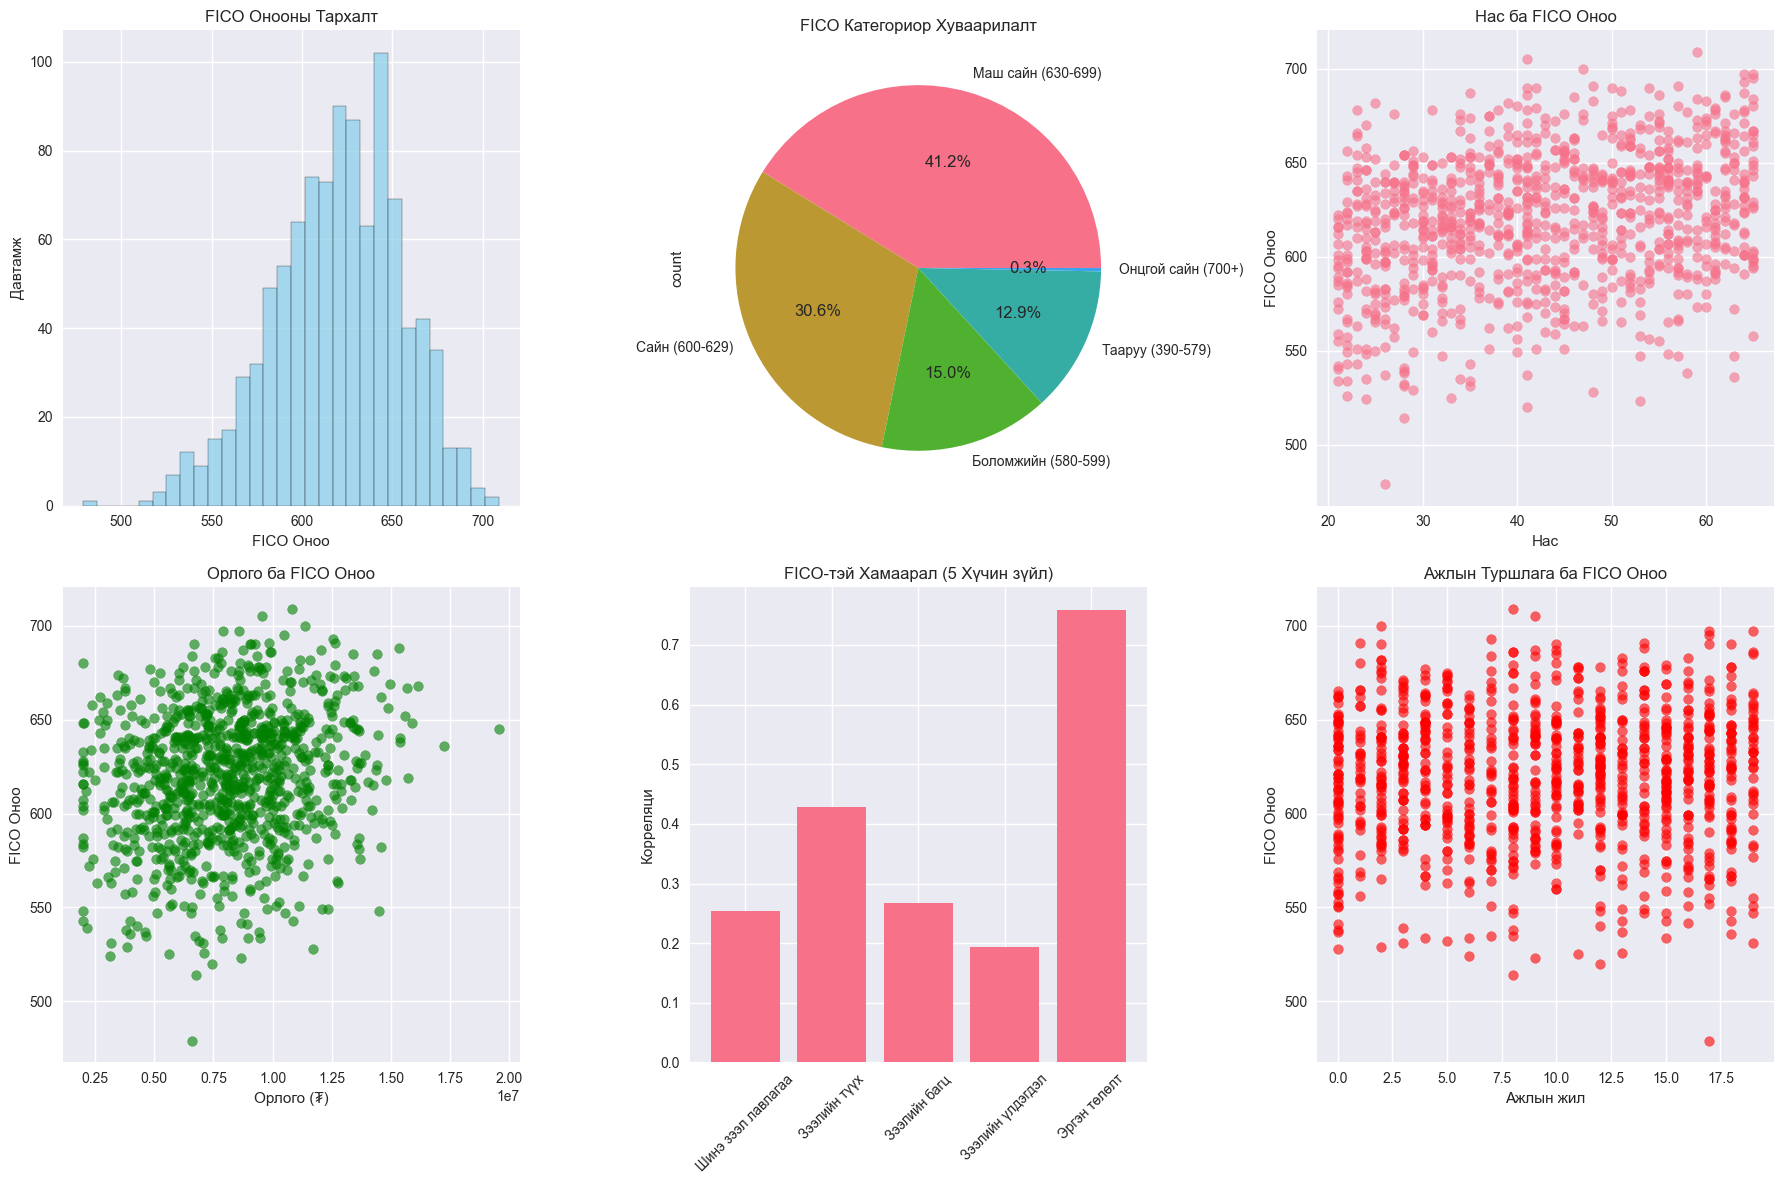

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

axes[0,0].hist(df['FICO оноо'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('FICO Онооны Тархалт')
axes[0,0].set_xlabel('FICO Оноо')
axes[0,0].set_ylabel('Давтамж')

df['FICO категори'].value_counts().plot(kind='pie', ax=axes[0,1], autopct='%1.1f%%')
axes[0,1].set_title('FICO Категориор Хуваарилалт')

axes[0,2].scatter(df['Нас'], df['FICO оноо'], alpha=0.6)
axes[0,2].set_title('Нас ба FICO Оноо')
axes[0,2].set_xlabel('Нас')
axes[0,2].set_ylabel('FICO Оноо')

axes[1,0].scatter(df['Орлого (₮)'], df['FICO оноо'], alpha=0.6, color='green')
axes[1,0].set_title('Орлого ба FICO Оноо')
axes[1,0].set_xlabel('Орлого (₮)')
axes[1,0].set_ylabel('FICO Оноо')

credit_factors = ['Шинэ зээл лавлагаа(%)', 'Зээлийн түүх(%)', 'Зээлийн багц(%)', 
                 'Зээлийн үлдэгдэл(%)', 'Эргэн төлөлт(%)']
factor_corr = df[credit_factors + ['FICO оноо']].corr()['FICO оноо'][:-1]

axes[1,1].bar(range(len(factor_corr)), factor_corr.values)
axes[1,1].set_title('FICO-тэй Хамаарал (5 Хүчин зүйл)')
axes[1,1].set_xticks(range(len(factor_corr)))
axes[1,1].set_xticklabels([f.replace('(%)', '') for f in factor_corr.index], rotation=45)
axes[1,1].set_ylabel('Корреляци')

axes[1,2].scatter(df['Ажлын жил'], df['FICO оноо'], alpha=0.6, color='red')
axes[1,2].set_title('Ажлын Туршлага ба FICO Оноо')
axes[1,2].set_xlabel('Ажлын жил')
axes[1,2].set_ylabel('FICO Оноо')

plt.tight_layout()
plt.show()

1-FICO ОНООНЫ ТАРХАЛТ
 - Хэлбэр нь Normal Distribution. 
 - Ихэнхи хүмүүс 620-650 орчим хооронд FICO оноотой байна. Энэ нь ихэнхи хүмүүс нь "Маш сайн" болон "Сайн" категорт байрлаж байгааг харуулж байна.

2-FICO КАТЕГОРИ ХУВААРИЛАЛТ
 - Маш сайн (630-699): 41.2% - хамгийн том хэсэг
 - Сайн (600-629): 30.6% - хоёр дахь том хэсэг
 - Боломжийн (580-599): 15.0%
 - Тааруу (390-579): 12.9%
 - Онцгой сайн (700+): зөвхөн 0.3% - маш цөөн
 - Дүгнэлт: 71.8% нь зөвшөөрөгдөх түвшинд (сайн ба түүнээс дээш)

3-HAC БА FICO ОНОО
- График дээр эерэг хамаарал харагдаж байна:
 - Залуу (20-30 нас): Ихэвчлэн 500-600 FICO оноотой
 - Дунд нас (40-50): 600-650 оноотой
 - Ахмад нас (60+): 650-700+ оноотой
- Учир шалтгаан: Нас ихсэх тусам Зээлийн түүх урт болдог (15% хүчин зүйл), ажлын туршлага нэмэгддэг, орлого тогтвортой болдог, зээлийн менежмент дээрдэг.

4-ОРЛОГО БА FICO ОНОО
- Хамаарал: Орлого ихсэх тусам FICO оноо сайжирдаг
 - Бага орлоготой: 550-600 оноо
 - Өндөр орлоготой: 650-700 оноо
- Дүгнэлт: Орлого нь FICO оноонд эерэг нөлөө үзүүлж байна

5-FICO-ТОЙ ХАМААРАЛТАЙ 5 ХҮЧИН ЗҮЙЛС
 - Эргэн төлөлт: Хамгийн өндөр корреляци (~0.75) - чухал хүчин зүйл
 - Зээлийн үлдэгдэл: Дунд зэрэг корреляци (~0.43)
 - Зээлийн түүх: Дунд зэрэг корреляци (~0.28)
 - Зээлийн багц ба Шинэ зээл: Бага корреляци (~0.20-0.25)
- Дүгнэлт: Эргэн төлөлт хамгийн чухал, стандарт FICO загвартай таарч байна

6-АЖЛЫН ТУРШЛАГА БА FICO ОНОО 
 - Хамаарал: Ажлын туршлага ихсэх тусам FICO оноо сайжирна
 - Шинэ ажилтан (0-2 жил): Доод оноо
 - Туршлагатай (10+ жил): Өндөр оноо
- Дүгнэлт: Ажлын тогтвортой байдал зээлийн найдвартай байдлыг нэмэгдүүлдэг

НИЙТ ДҮГНЭЛТ:
 - Сайн зүйл нь 71.8% хүмүүс зөвшөөрөгдөх FICO оноотой
 - Анхаарах зүйл нь Онцгой сайн (700+) категорид маш цөөн хүн орж байна

In [14]:
print("Correlation")
numeric_cols = ['Орлого (₮)', 'Нас', 'Туршлага (жил)', 'Ажлын жил', 'Оршин суусны жил',
               'Шинэ зээл лавлагаа(%)', 'Зээлийн түүх(%)', 'Зээлийн багц(%)', 
               'Зээлийн үлдэгдэл(%)', 'Эргэн төлөлт(%)', 'FICO оноо']

correlation_matrix = df[numeric_cols].corr()

print("FICO оноотой хамаарал:")
fico_correlations = correlation_matrix['FICO оноо'].drop('FICO оноо').sort_values(ascending=False)

for col, corr in fico_correlations.items():
    print(f"  {col}: {corr:.3f}")
print("\n")

Correlation
FICO оноотой хамаарал:
  Эргэн төлөлт(%): 0.759
  Зээлийн түүх(%): 0.428
  Туршлага (жил): 0.351
  Нас: 0.279
  Зээлийн багц(%): 0.268
  Шинэ зээл лавлагаа(%): 0.254
  Зээлийн үлдэгдэл(%): 0.194
  Орлого (₮): 0.194
  Оршин суусны жил: 0.027
  Ажлын жил: 0.027




In [15]:
print("Categorical features")
categorical_cols = ['Гэрлэсэн эсэх', 'Орон сууц', 'Машинтай эсэх', 'Мэргэжил', 'Хот']

for col in categorical_cols:
    print(f"\n{col} ба FICO онооны хамаарал:")
    grouped = df.groupby(col)['FICO оноо'].agg(['mean', 'std', 'count'])
    print(grouped)

Categorical features

Гэрлэсэн эсэх ба FICO онооны хамаарал:
                     mean        std  count
Гэрлэсэн эсэх                              
тийм           619.813589  35.221490    574
үгүй           619.192488  35.788208    426

Орон сууц ба FICO онооны хамаарал:
                   mean        std  count
Орон сууц                                
түрээсэлдэг  621.891534  35.468167    378
эзэмшдэг     617.949057  35.734466    530
эзэмшилгүй   619.141304  33.488257     92

Машинтай эсэх ба FICO онооны хамаарал:
                     mean        std  count
Машинтай эсэх                              
тийм           620.374101  34.960305    695
үгүй           617.668852  36.522143    305

Мэргэжил ба FICO онооны хамаарал:
                  mean        std  count
Мэргэжил                                
Багш        623.720000  35.146757    100
Борлуулагч  618.893617  32.326449     94
Бусад       616.785047  38.468568    107
Инженер     618.129032  35.821485     93
Менежер     620.6705

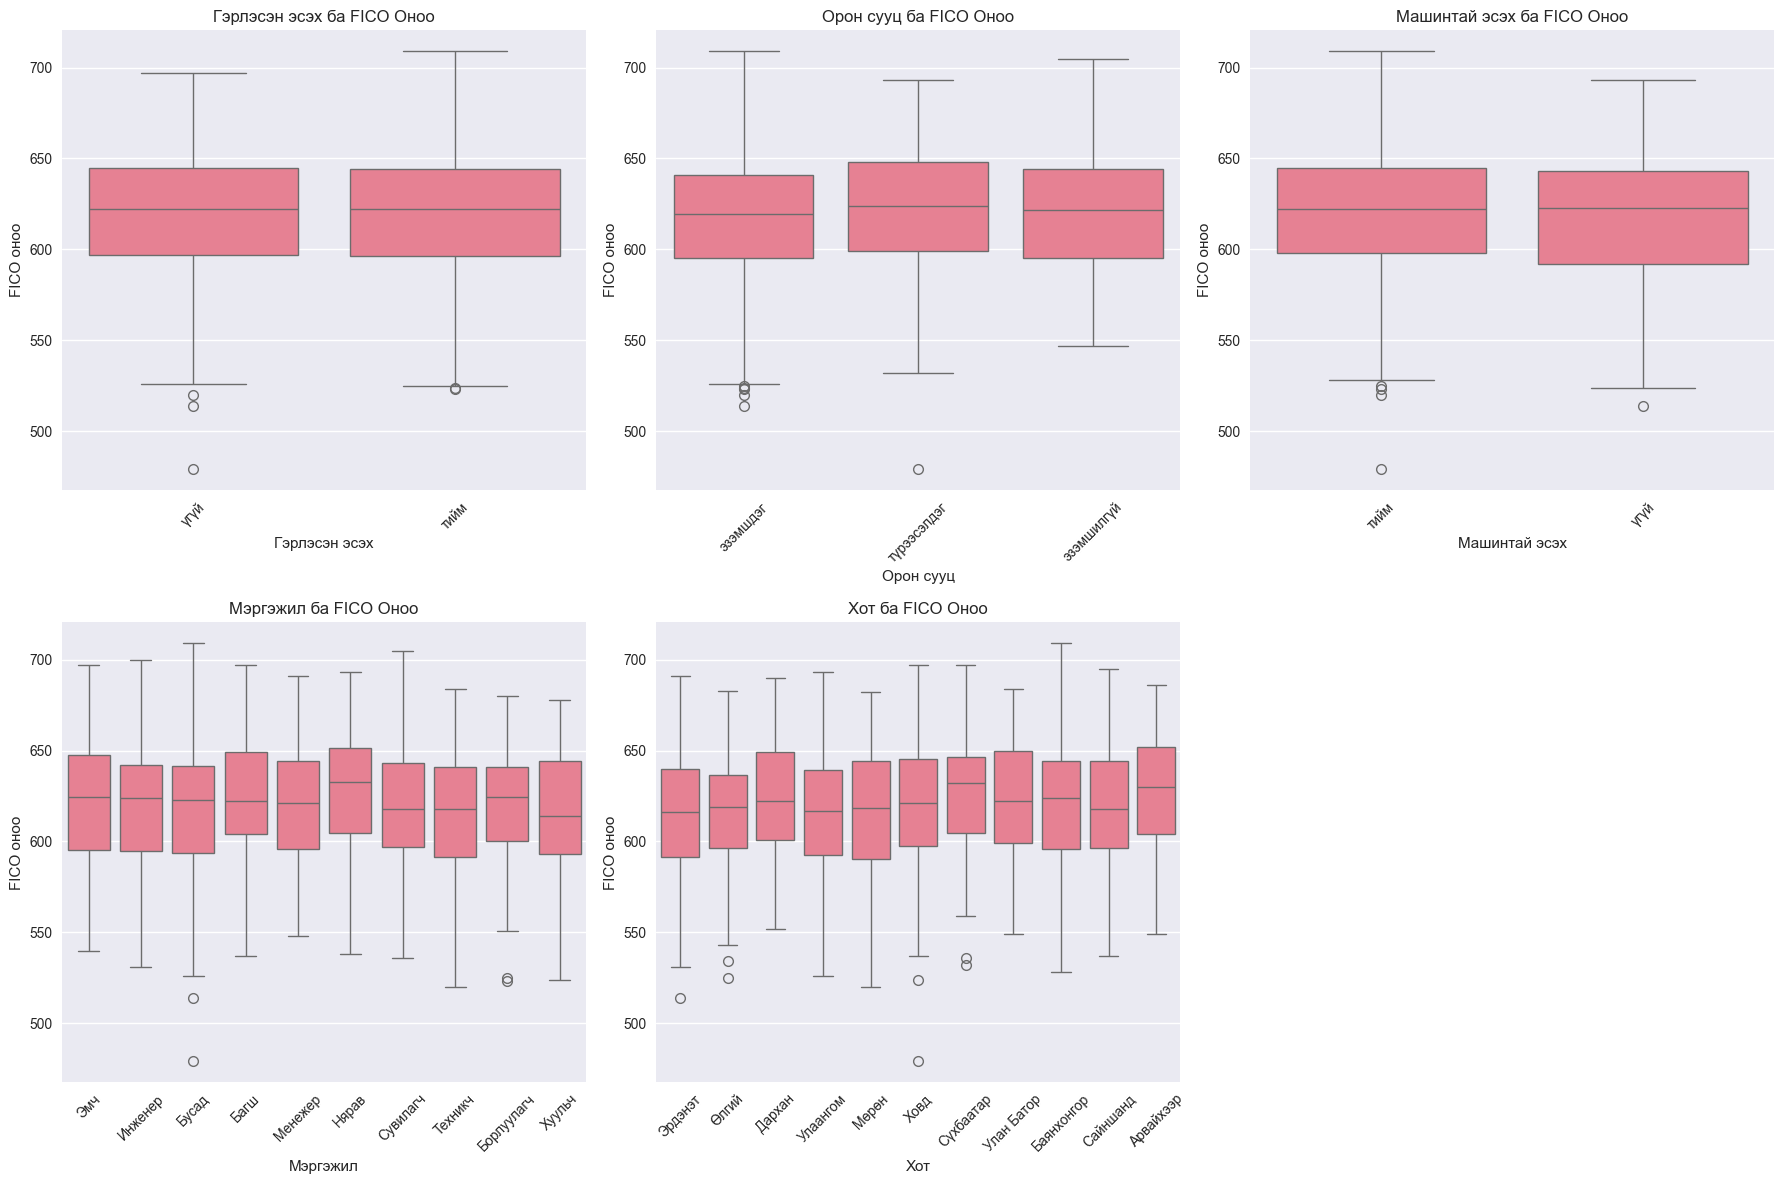

In [16]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    if i < len(axes):
        sns.boxplot(data=df, x=col, y='FICO оноо', ax=axes[i])
        axes[i].set_title(f'{col} ба FICO Оноо')
        axes[i].tick_params(axis='x', rotation=45)

if len(categorical_cols) < len(axes):
    axes[-1].set_visible(False)

plt.tight_layout()
plt.show()

1-ГЭРЛЭСЭН БА FICO ОНОО /дунджаар/
- Гэрлэсэн: 619.8 оноо (574 хүн, 57.4%)
- Гэрлээгүй: 619.2 оноо (426 хүн, 42.6%) 
- Ялгаа: Зөвхөн 0.6 оноо
- Дүгнэлт: Гэрлэлтийн статус FICO оноонд бараг нөлөө үзүүлэхгүй байна. Энэ нь ML model-д чухал feature биш байж магадгүй.

2-ОРОН СУУЦ БА FICO ОНОО /дунджаар/
- Түрээсэлдэг: 621.9 оноо (378 хүн) - хамгийн өндөр
- Эзэмшдэг: 617.9 оноо (530 хүн) - хамгийн бага
- Эзэмшилгүй: 619.1 оноо (92 хүн)
- Сонирхолтой дүгнэлт: Түрээсэлдэг хүмүүс илүү сайн FICO оноотой! Энэ нь: Түрээс төлж чаддаг = тогтмол орлоготой. Байр эзэмшдэг = зээлтэй байж магадгүй (ипотек)

3-МАШИНТАЙ ЭСЭХ БА FICO ОНОО /дунджаар/
- График дээр: Хоёр бүлэг бараг адилхан
- Дүгнэлт: Машин эзэмшилт FICO оноонд төдийлөн нөлөө үзүүлэхгүй байна.

4-МЭРГЭЖИЛ БА FICO ОНОО /дунджаар/
- Өндөр FICO оноотой мэргэжлүүд: Нярав: 627.4 оноо, Багш: 623.7 оноо, Эмч: 621.0 оноо, Менежер: 620.7 оноо

- Доод FICO оноотой мэргэжлүүд: Техникч: 614.2 оноо - хамгийн бага, Хуульч: 615.1 оноо, Бусад: 616.8 оноо

Дүгнэлт:
 - Нярав хамгийн өндөр FICO оноотой (тогтмол орлого)
 - Хуульч доод FICO оноотой (орлогын тэгш бус байдал?)

5-ХОТ БА FICO ОНОО /дунджаар/
- График дээр: Бүх хот бараг ижил түвшинд байна
- Дүгнэлт: Хот нь FICO оноонд чухал нөлөө үзүүлэхгүй байна. Энэ нь сайн шинж - газар зүйн ялгаварлал бага байгааг илтгэж байна

In [17]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [18]:
df_fe = df.copy()

In [19]:
df_fe['Туршлага_харьцаа'] = df_fe['Туршлага (жил)'] / df_fe['Нас']

In [20]:
df_encoded = df_fe.copy()
le_profession = LabelEncoder()
df_encoded['Мэргэжил'] = le_profession.fit_transform(df_encoded['Мэргэжил'])

In [21]:
df_encoded

,ID,Орлого (₮),Нас,Туршлага (жил),Гэрлэсэн эсэх,Орон сууц,Машинтай эсэх,Мэргэжил,Хот,Ажлын жил,Оршин суусны жил,Шинэ зээл лавлагаа(%),Зээлийн түүх(%),Зээлийн багц(%),Зээлийн үлдэгдэл(%),Эргэн төлөлт(%),FICO оноо,FICO категори,Туршлага_харьцаа
0,1,9490142,64,29,үгүй,эзэмшдэг,тийм,9,Эрдэнэт,11,18,50,100.0,80,19.0,100.0,677,Маш сайн (630-699),0.453125
1,2,7585207,60,21,үгүй,эзэмшдэг,тийм,3,Өлгий,13,15,80,100.0,81,15.2,97.4,683,Маш сайн (630-699),0.350000
2,3,9943065,31,11,тийм,эзэмшдэг,тийм,2,Дархан,11,14,90,83.1,86,19.9,68.9,630,Маш сайн (630-699),0.354839
3,4,12569089,23,2,тийм,эзэмшдэг,тийм,0,Дархан,9,15,80,50.9,48,25.1,84.3,616,Сайн (600-629),0.086957
4,5,7297539,26,6,үгүй,эзэмшдэг,тийм,4,Улаангом,19,10,40,62.2,62,14.6,78.8,583,Боломжийн (580-599),0.230769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,7156699,41,14,тийм,эзэмшилгүй,тийм,8,Улаангом,18,16,90,76.7,90,14.3,100.0,678,Маш сайн (630-699),0.341463
996,997,13393059,50,5,тийм,эзэмшдэг,үгүй,5,Ховд,18,19,60,73.6,76,26.8,98.2,668,Маш сайн (630-699),0.100000
997,998,9922528,44,16,үгүй,эзэмшдэг,тийм,1,Улан Батор,12,10,60,100.0,75,19.8,77.1,637,Маш сайн (630-699),0.363636
998,999,6286463,64,11,тийм,эзэмшдэг,үгүй,0,Улаангом,11,12,70,91.9,85,12.6,73.6,623,Сайн (600-629),0.171875


In [22]:
important_features = [
    'Эргэн төлөлт(%)',
    'Зээлийн түүх(%)', 
    'Туршлага (жил)',
    'Нас',
    'Зээлийн багц(%)',
    'Шинэ зээл лавлагаа(%)',
    'Туршлага_харьцаа',
    'Мэргэжил']

In [23]:
df_final = df_encoded[important_features + ['FICO оноо']].copy()

In [24]:
numerical_features = [
    'Эргэн төлөлт(%)', 'Зээлийн түүх(%)', 'Туршлага (жил)', 
    'Нас', 'Зээлийн багц(%)', 'Шинэ зээл лавлагаа(%)',
    'Туршлага_харьцаа']

scaler = StandardScaler()
df_final[numerical_features] = scaler.fit_transform(df_final[numerical_features])

In [25]:
df_final

,Эргэн төлөлт(%),Зээлийн түүх(%),Туршлага (жил),Нас,Зээлийн багц(%),Шинэ зээл лавлагаа(%),Туршлага_харьцаа,Мэргэжил,FICO оноо
0,1.395300,1.149882,1.639051,1.626542,0.580374,-1.176657,1.116521,9,677
1,1.219418,1.149882,0.873899,1.319082,0.638313,0.577802,0.548265,3,683
2,-0.708521,0.303478,-0.082541,-0.910006,0.928007,1.162622,0.574928,2,630
3,0.333243,-1.309196,-0.943337,-1.524927,-1.273670,0.577802,-0.901199,0,616
4,-0.038816,-0.743257,-0.560761,-1.294331,-0.462526,-1.761477,-0.108740,4,583
...,...,...,...,...,...,...,...,...,...
995,1.395300,-0.017053,0.204391,-0.141355,1.159762,1.162622,0.501225,8,678
996,1.273536,-0.172311,-0.656405,0.550431,0.348618,-0.591838,-0.829325,5,668
997,-0.153816,1.149882,0.395679,0.089240,0.290679,-0.591838,0.623406,1,637
998,-0.390580,0.744209,-0.082541,1.626542,0.870068,-0.007018,-0.433268,0,623


In [26]:
correlations = df_final.corrwith(df_final['FICO оноо']).abs().sort_values(ascending=False)[1:]
print(f"\nЭцсийн features-ийн корреляци:")
for feature, corr in correlations.items():
    print(f"  {feature}: {corr:.3f}")


Эцсийн features-ийн корреляци:
  Эргэн төлөлт(%): 0.759
  Зээлийн түүх(%): 0.428
  Туршлага_харьцаа: 0.354
  Туршлага (жил): 0.351
  Нас: 0.279
  Зээлийн багц(%): 0.268
  Шинэ зээл лавлагаа(%): 0.254
  Мэргэжил: 0.024


In [27]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [28]:
X = df_final.drop(['FICO оноо'], axis=1)
y = df_final['FICO оноо']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
print(f"\nTrain set: {X_train.shape}")
print(f"Test set: {X_test.shape}")


Train set: (800, 8)
Test set: (200, 8)


In [31]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Support Vector': SVR(kernel='rbf', C=100, gamma='scale')}

In [32]:
results = {}

In [33]:
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    
    results[name] = {
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'model': model}
    
    print(f"{name:<18}: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

Linear Regression : 0.9268 (±0.0051)
Ridge Regression  : 0.9268 (±0.0050)
Lasso Regression  : 0.9242 (±0.0053)
Random Forest     : 0.8652 (±0.0209)
Gradient Boosting : 0.8968 (±0.0123)
Support Vector    : 0.9100 (±0.0058)


In [34]:
best_model_name = max(results.keys(), key=lambda x: results[x]['cv_mean'])
best_model = results[best_model_name]['model']

print(f"\n Хамгийн сайн model: {best_model_name}")
print(f"CV R2 score: {results[best_model_name]['cv_mean']:.4f}")


 Хамгийн сайн model: Ridge Regression
CV R2 score: 0.9268


Ridge Regression = Linear Regression + L2 penalty юм.

In [35]:
param_grid = {
        'alpha': [0.1, 1.0, 10.0, 100.0]}

In [36]:
grid_search = GridSearchCV(
        best_model, param_grid, cv=5, scoring='r2', n_jobs=-1)

In [37]:
grid_search.fit(X_train, y_train)

,estimator,Ridge()
,param_grid,"{'alpha': [0.1, 1.0, ...]}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,1.0


In [38]:
best_model = grid_search.best_estimator_

In [39]:
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV score: {grid_search.best_score_:.4f}")

Best parameters: {'alpha': 1.0}
Best CV score: 0.9268


In [40]:
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

In [41]:
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"Model: {best_model_name}")
print(f"\nTrain Set:")
print(f"  R2 Score: {train_r2:.4f}")
print(f"  RMSE: {train_rmse:.2f}")
print(f"  MAE: {train_mae:.2f}")

Model: Ridge Regression

Train Set:
  R2 Score: 0.9291
  RMSE: 9.52
  MAE: 7.62


In [43]:
if train_r2 - test_r2 > 0.1:
    print(f"\n  Overfitting илэрсэн (train-test ялгаа: {train_r2-test_r2:.3f})")
else:
    print(f"\n  Overfitting байхгүй (train-test ялгаа: {train_r2-test_r2:.3f})")


  Overfitting байхгүй (train-test ялгаа: 0.009)


In [44]:
if hasattr(best_model, 'feature_importances_'):
    print(f"\n FEATURE IMPORTANCE ({best_model_name})")
    print("-" * 40)
    
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    for i, row in feature_importance.iterrows():
        print(f"  {row['feature']:<25}: {row['importance']:.4f}")

elif hasattr(best_model, 'coef_'):
    print(f"\n FEATURE COEFFICIENTS ({best_model_name})")
    print("-" * 40)
    
    coefficients = pd.DataFrame({
        'feature': X.columns,
        'coefficient': best_model.coef_
    }).sort_values('coefficient', key=abs, ascending=False)
    
    for i, row in coefficients.iterrows():
        print(f"  {row['feature']:<25}: {row['coefficient']:+.4f}")


 FEATURE COEFFICIENTS (Ridge Regression)
----------------------------------------
  Эргэн төлөлт(%)          : +27.8837
  Зээлийн түүх(%)          : +16.5494
  Шинэ зээл лавлагаа(%)    : +9.5927
  Зээлийн багц(%)          : +9.0396
  Туршлага_харьцаа         : -2.1608
  Туршлага (жил)           : +1.7009
  Нас                      : -0.4635
  Мэргэжил                 : -0.0747


In [45]:
sample_indices = range(5)
for i in sample_indices:
    actual = y_test.iloc[i]
    predicted = y_test_pred[i]
    error = abs(actual - predicted)
    
    print(f"#{i+1}: Actual={actual:.0f}, Predicted={predicted:.0f}, Error={error:.1f}")

#1: Actual=589, Predicted=587, Error=2.4
#2: Actual=652, Predicted=642, Error=10.3
#3: Actual=618, Predicted=636, Error=18.1
#4: Actual=594, Predicted=601, Error=6.7
#5: Actual=537, Predicted=549, Error=12.4


In [46]:
accuracy_pct = test_r2 * 100
print(f" Model accuracy: {accuracy_pct:.1f}%")
print(f" Дундаж алдаа: {test_mae:.1f} оноо")

 Model accuracy: 92.0%
 Дундаж алдаа: 7.7 оноо
